
# IS-4100: PCA and Clustering with NFL Data

**Objective:**

This lab will introduce you to principal component analysis (PCA) and clustering techniques to analyze and interpret NFL data. You will explore how dimensionality reduction can simplify data and how clustering can reveal patterns within NFL team or player performance metrics.

---

## Section 1: Data Preparation and Exploration

### Load the Data
- Use either `nflfastR` or `nfl_data_py` to load the play-by-play data or season stats for a specific range.
- Filter the data to focus on key columns such as `yards_gained`, `pass_attempt`, `rush_attempt`, `touchdown`, `interception`, `sack`, etc.

### Feature Engineering
- Create aggregated metrics for each team or player, such as:
  - Average yards per game
  - Touchdowns per game
  - Passing and rushing attempts per game
  - Average turnovers per game
- Ensure the final dataset has all numeric columns necessary for PCA and clustering.

### Data Cleaning
- Check for missing values, handling them appropriately.
- Standardize or normalize data to ensure comparability across features.

---

## Section 2: Principal Component Analysis (PCA)

### Perform PCA
- Apply PCA to the dataset to reduce it to two or three principal components.
- Use a scree plot to determine the number of components that capture the majority of variance.

### Interpret PCA Results
- Examine the component loadings to understand which metrics contribute most to each principal component.
- Discuss how PCA has simplified the data and retained the most critical information.

### Visualization
- Plot the data points in a 2D or 3D scatterplot using the principal components as axes.
- Label data points by team or player for better insights.

---

## Section 3: Clustering

### Choosing a Clustering Algorithm
- Select either K-means or hierarchical clustering for this analysis.
- Determine an appropriate number of clusters by using techniques like the elbow method or silhouette score.

### Run Clustering Algorithm
- Apply the chosen clustering algorithm to the PCA-reduced dataset.
- Assign a cluster label to each team or player based on the results.

### Visualize Clusters
- Create a scatter plot showing the clusters with different colors, and label key data points.
- Discuss the composition of each cluster (e.g., are certain teams or players consistently high-performing in specific metrics?).

---

## Section 4: Interpretation and Analysis

### Analyze Cluster Characteristics
- Compare clusters to identify patterns, such as clusters of teams with strong passing vs. rushing stats or players with high-risk, high-reward play styles.

### Discuss Findings
- Write a summary explaining how PCA helped to reduce data complexity and what the clusters reveal about NFL team or player performance.


---

## Questions for Reflection:
1. How did PCA simplify the dataset, and what insights were preserved?
2. Were there any clusters that grouped similar types of players or teams? Describe these patterns.
3. If you were to adjust the clustering parameters, what changes might you explore?

## Setup

In [ ]:
!pip install nfl_data_py

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nfl_data_py as nfl
import plotly.express as px
from sklearn.decomposition import PCA
from scipy.cluster.vq import vq, kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Data Preparation and Exploration

In [ ]:
# load in PBP data
pbp = nfl.import_pbp_data(range(2016, 2023 + 1))

2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
Downcasting floats.


In [ ]:
# view pbp data
pbp.head()

,play_id,game_id,old_game_id_x,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type
0,1.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,None,None,None,...,,,0.0,0.0,NaN,NaN,None,None,None,None
1,36.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,BUF,...,00-0030041;00-0030073;00-0029799;00-0030433;00...,00-0029892;00-0029895;00-0028497;00-0027539;00...,10.0,11.0,NaN,NaN,None,None,None,None
2,58.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,BUF,...,00-0029892;00-0027714;00-0032965;00-0029893;00...,00-0029542;00-0031171;00-0029566;00-0030073;00...,11.0,11.0,NaN,NaN,None,None,None,None
3,85.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,BUF,...,00-0029892;00-0027714;00-0032965;00-0029893;00...,00-0031171;00-0029542;00-0029566;00-0030073;00...,11.0,11.0,-4.53,2.404,False,FLAT,None,None
4,109.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,BUF,...,00-0029892;00-0027714;00-0032965;00-0029893;00...,00-0029542;00-0031171;00-0029566;00-0030073;00...,11.0,11.0,NaN,NaN,None,None,None,None


In [ ]:
# filter data to desired columns
pbp = pbp.filter(['game_id', 'season', 'posteam', 'defteam', 'play_type', 'yards_gained', 'pass_attempt', 'rush_attempt', 'touchdown', 'interception', 'sack'])

# view dataframe
pbp.head()

,game_id,season,posteam,defteam,play_type,yards_gained,pass_attempt,rush_attempt,touchdown,interception,sack
0,2016_01_BUF_BAL,2016,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1,2016_01_BUF_BAL,2016,BAL,BUF,kickoff,0.0,0.0,0.0,0.0,0.0,0.0
2,2016_01_BUF_BAL,2016,BAL,BUF,run,6.0,0.0,1.0,0.0,0.0,0.0
3,2016_01_BUF_BAL,2016,BAL,BUF,pass,5.0,1.0,0.0,0.0,0.0,0.0
4,2016_01_BUF_BAL,2016,BAL,BUF,run,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# aggregate data
# Create aggregated metrics for each team or player, such as:
# Average yards per game
# Touchdowns per game
# Passing and rushing attempts per game
# Average turnovers per game
pbp_agg = pbp.groupby(['game_id', 'posteam', 'season']).agg(
    {
        'yards_gained': 'sum',
        'pass_attempt': 'sum',
        'rush_attempt': 'sum',
        'touchdown': 'sum',
        'interception': 'sum',
        'sack': 'sum'
    }
)

# rename columns for clarity
pbp_agg.rename(
    columns = {
      'sack': 'sacks_against',
      'interception': 'interceptions_against'
    }, inplace = True
)

pbp_agg.head()

yards_gained  pass_attempt  rush_attempt  \
game_id         posteam season                                             
2016_01_BUF_BAL BAL     2016           308.0          37.0          28.0   
                BUF     2016           160.0          24.0          24.0   
2016_01_CAR_DEN CAR     2016           333.0          36.0          32.0   
                DEN     2016           307.0          28.0          29.0   
2016_01_CHI_HOU CHI     2016           258.0          34.0          20.0   

                                touchdown  interceptions_against  \
game_id         posteam season                                     
2016_01_BUF_BAL BAL     2016          1.0                    0.0   
                BUF     2016          1.0                    0.0   
2016_01_CAR_DEN CAR     2016          2.0                    1.0   
                DEN     2016          3.0                    2.0   
2016_01_CHI_HOU CHI     2016          2.0                    1.0   

                                sacks_against  
game_id         posteam season                 
2016_01_BUF_BAL BAL     2016              4.0  
                BUF     2016              2.0  
2016_01_CAR_DEN CAR     2016              3.0  
                DEN     2016              2.0  
2016_01_CHI_HOU CHI     2016              5.0

In [ ]:
# get averages for each season
pbp_agg_season = pbp_agg.groupby(['season', 'posteam']).agg(
    {
      'yards_gained': 'mean',
      'pass_attempt': 'mean',
      'rush_attempt': 'mean',
      'touchdown': 'mean',
      'interceptions_against': 'mean',
      'sacks_against': 'mean'
    }
)

In [ ]:
pbp_agg_season.head()

yards_gained  pass_attempt  rush_attempt  touchdown  \
season posteam                                                        
2016   ARI        366.875000       43.1875      24.93750   3.187500   
       ATL        416.631592       36.0000      26.31579   3.842105   
       BAL        348.187500       44.8125      22.93750   1.937500   
       BUF        354.625000       32.6250      30.87500   2.937500   
       CAR        344.062500       37.7500      28.37500   2.625000   

                interceptions_against  sacks_against  
season posteam                                        
2016   ARI                   1.062500       2.562500  
       ATL                   0.368421       2.368421  
       BAL                   1.000000       2.062500  
       BUF                   0.437500       2.875000  
       CAR                   1.187500       2.250000

In [ ]:
# import win total data
schedules = nfl.import_schedules(range(2016, 2023 + 1))

# view dataframe
schedules.head()

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
4515,2016_01_CAR_DEN,2016,REG,1,2016-09-08,Thursday,20:30,CAR,20.0,DEN,...,10.0,00-0027939,00-0032156,Cam Newton,Trevor Siemian,Ron Rivera,Gary Kubiak,Gene Steratore,DEN00,Sports Authority Field at Mile High
4516,2016_01_TB_ATL,2016,REG,1,2016-09-11,Sunday,13:00,TB,31.0,ATL,...,NaN,00-0031503,00-0026143,Jameis Winston,Matt Ryan,Dirk Koetter,Dan Quinn,Jeff Triplette,ATL00,Georgia Dome
4517,2016_01_BUF_BAL,2016,REG,1,2016-09-11,Sunday,13:00,BUF,7.0,BAL,...,8.0,00-0028118,00-0026158,Tyrod Taylor,Joe Flacco,Rex Ryan,John Harbaugh,Brad Allen,BAL00,M&T Bank Stadium
4518,2016_01_CHI_HOU,2016,REG,1,2016-09-11,Sunday,13:00,CHI,14.0,HOU,...,NaN,00-0024226,00-0029682,Jay Cutler,Brock Osweiler,John Fox,Bill O'Brien,Peter Morelli,HOU00,NRG Stadium
4519,2016_01_GB_JAX,2016,REG,1,2016-09-11,Sunday,13:00,GB,27.0,JAX,...,3.0,00-0023459,00-0031407,Aaron Rodgers,Blake Bortles,Mike McCarthy,Gus Bradley,Carl Cheffers,JAX00,EverBank Field


In [ ]:
# filter schedules data down
schedules = schedules.filter(['season', 'game_id', 'home_team', 'home_score', 'away_team', 'away_score', 'result'])

# view dataframe
schedules.head()

# result indicates the score between the games

,season,game_id,home_team,home_score,away_team,away_score,result
4515,2016,2016_01_CAR_DEN,DEN,21.0,CAR,20.0,1.0
4516,2016,2016_01_TB_ATL,ATL,24.0,TB,31.0,-7.0
4517,2016,2016_01_BUF_BAL,BAL,13.0,BUF,7.0,6.0
4518,2016,2016_01_CHI_HOU,HOU,23.0,CHI,14.0,9.0
4519,2016,2016_01_GB_JAX,JAX,23.0,GB,27.0,-4.0


In [ ]:
# add column indicating if home team won or lost
schedules['home_won'] = np.where(schedules['result'] > 0, 1, 0)
schedules['away_won'] = np.where(schedules['result'] < 0, 1, 0)

# view dataframe
schedules.head()

home_team_wins = schedules.groupby(['season', 'home_team']).agg(
    {
        'home_won': 'sum',
        'away_won': 'sum'
    }
)

away_team_wins = schedules.groupby(['season', 'away_team']).agg(
    {
        'away_won': 'sum',
        'home_won': 'sum'
    }
)

home_team_wins.rename(columns = {'home_won': 'home_wins', 'away_won': 'home_losses'}, inplace = True)
away_team_wins.rename(columns = {'away_won': 'away_wins', 'home_won': 'away_losses'}, inplace = True)

home_team_wins.head()

home_wins  home_losses
season home_team                        
2016   ARI                4            3
       ATL                7            4
       BAL                6            2
       BUF                4            4
       CAR                4            4

In [ ]:
# add team variable for merging
home_team_wins['team'] = home_team_wins.index.get_level_values(1)
away_team_wins['team'] = away_team_wins.index.get_level_values(1)

home_team_wins.head()

home_wins  home_losses team
season home_team                             
2016   ARI                4            3  ARI
       ATL                7            4  ATL
       BAL                6            2  BAL
       BUF                4            4  BUF
       CAR                4            4  CAR

In [ ]:
# merge dataframes to get total wins
wins_total = home_team_wins.merge(away_team_wins, left_on = ['season', 'home_team'], right_on = ['season', 'away_team'])

wins_total = wins_total.rename(columns = {"home_team": "team"})

wins_total.head()

,home_wins,home_losses,team_x,away_wins,away_losses,team_y
season,,,,,,
2016,4,3,ARI,3,5,ARI
2016,7,4,ATL,6,2,ATL
2016,6,2,BAL,2,6,BAL
2016,4,4,BUF,3,5,BUF
2016,4,4,CAR,2,6,CAR


In [ ]:
# change team_x variable
wins_total.rename(columns = {'team_x': 'team'}, inplace = True)

# add wins, losses, win_pct variables
wins_total['wins'] = wins_total['home_wins'] + wins_total['away_wins']
wins_total['losses'] = wins_total['home_losses'] + wins_total['away_losses']
wins_total['win_pct'] = round(wins_total['wins'] / (wins_total['wins'] + wins_total['losses']), 3)

# drop home and away losses
wins_total.drop(columns = ['home_wins', 'away_wins', 'home_losses', 'away_losses'], inplace = True)

wins_total.head()

,team,team_y,wins,losses,win_pct
season,,,,,
2016,ARI,ARI,7,8,0.467
2016,ATL,ATL,13,6,0.684
2016,BAL,BAL,8,8,0.500
2016,BUF,BUF,7,9,0.438
2016,CAR,CAR,6,10,0.375


In [ ]:
# combine stats and wins/losses
season_data = pbp_agg_season.merge(wins_total, left_on = ['season', 'posteam'], right_on = ['season', 'team_y'])

# reset index
season_data.reset_index(inplace = True)

# drop team_y variable
season_data.drop(columns = ['team_y'], inplace = True)

# view season_data
season_data.head()

,season,yards_gained,pass_attempt,rush_attempt,touchdown,interceptions_against,sacks_against,team,wins,losses,win_pct
0,2016,366.875000,43.1875,24.93750,3.187500,1.062500,2.562500,ARI,7,8,0.467
1,2016,416.631592,36.0000,26.31579,3.842105,0.368421,2.368421,ATL,13,6,0.684
2,2016,348.187500,44.8125,22.93750,1.937500,1.000000,2.062500,BAL,8,8,0.500
3,2016,354.625000,32.6250,30.87500,2.937500,0.437500,2.875000,BUF,7,9,0.438
4,2016,344.062500,37.7500,28.37500,2.625000,1.187500,2.250000,CAR,6,10,0.375


## Principal Component Analysis

In [ ]:
# instantiate PCA class
pca = PCA(svd_solver = 'full')

# PCA on all components (not record data)
pca_data = pca.fit_transform(season_data[['yards_gained', 'pass_attempt', 'rush_attempt', 'touchdown', 'interceptions_against', 'sacks_against']])

# convert to dataframe
pca_data = pd.DataFrame(pca_data).reset_index(drop = True)

pca_data

,0,1,2,3,4,5
0,22.498915,5.550219,1.779900,0.229973,0.494968,0.169696
1,72.061913,-1.504405,-3.060925,0.773962,0.169737,-0.193143
2,3.822649,8.272959,1.790390,-0.505331,-0.449959,-0.003214
3,10.062639,-6.285408,0.300086,0.692027,0.151531,-0.241641
4,-0.394511,-0.595803,1.814785,-0.179063,0.124077,0.354443
...,...,...,...,...,...,...
246,-21.414347,2.088727,-3.134609,-0.324949,-0.359801,-0.106903
247,51.581795,-6.380280,-2.597862,0.197163,0.023157,0.128207
248,-20.370359,0.649044,-0.539702,-0.064320,-0.078061,-0.212067
249,-55.496929,-2.405901,-1.301714,0.918100,0.035931,-0.196242


Observe which variables are most impactful on each of the principal components.

* PC1: yards_gained
* PC2: pass_attempt & rush_attempt
* PC3: rush_attempt & pass_attempt
* PC4: interceptions_against
* PC5: sacks_against
* PC6: touchdown

In [ ]:
# showcase rotation (PCs) of data
rotation = pd.DataFrame(pca.components_, index = ['yards_gained', 'pass_attempt', 'rush_attempt', 'touchdown', 'interceptions_against', 'sacks_against'])

# show rotation dataframe
rotation

,0,1,2,3,4,5
yards_gained,0.999349,0.027304,0.016724,0.013413,-0.001941,-0.009598
pass_attempt,-0.010646,0.785340,-0.618123,-0.017943,0.018361,0.019828
rush_attempt,-0.029113,0.615683,0.785530,-0.041309,0.025365,0.026068
touchdown,0.010608,-0.031752,-0.008176,0.001174,0.010936,0.999345
interceptions_against,-0.014915,0.040255,0.021451,0.998282,-0.033599,0.000807
sacks_against,0.002259,-0.028315,-0.007741,0.034971,0.998883,-0.011959


In [ ]:
pca_data['team'] = season_data['team']
pca_data['season'] = season_data['season']
pca_data['win_pct'] = season_data['win_pct']

# view dataframe
pca_data.head()

# view shape
pca_data.shape

(251, 9)

In [ ]:
pca_data.head()

,0,1,2,3,4,5,team,season,win_pct
0,22.498915,5.550219,1.779900,0.229973,0.494968,0.169696,ARI,2016,0.467
1,72.061913,-1.504405,-3.060925,0.773962,0.169737,-0.193143,ATL,2016,0.684
2,3.822649,8.272959,1.790390,-0.505331,-0.449959,-0.003214,BAL,2016,0.500
3,10.062639,-6.285408,0.300086,0.692027,0.151531,-0.241641,BUF,2016,0.438
4,-0.394511,-0.595803,1.814785,-0.179063,0.124077,0.354443,CAR,2016,0.375


In [ ]:
# rename columns
pca_data.rename(columns = {
    0: "PC1",
    1: "PC2",
    2: "PC3",
    3: "PC4",
    4: "PC5",
    5: "PC6"
    }, inplace = True)

# view dataframe
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,team,season,win_pct
0,22.498915,5.550219,1.779900,0.229973,0.494968,0.169696,ARI,2016,0.467
1,72.061913,-1.504405,-3.060925,0.773962,0.169737,-0.193143,ATL,2016,0.684
2,3.822649,8.272959,1.790390,-0.505331,-0.449959,-0.003214,BAL,2016,0.500
3,10.062639,-6.285408,0.300086,0.692027,0.151531,-0.241641,BUF,2016,0.438
4,-0.394511,-0.595803,1.814785,-0.179063,0.124077,0.354443,CAR,2016,0.375


In [ ]:
# explained variance ratio
for i in range(len(pca.explained_variance_ratio_)):
  print(f"PC{i+1}: {pca.explained_variance_ratio_[i]:.3}")

PC1: 0.984
PC2: 0.0132
PC3: 0.0022
PC4: 0.000231
PC5: 7.01e-05
PC6: 4.66e-05


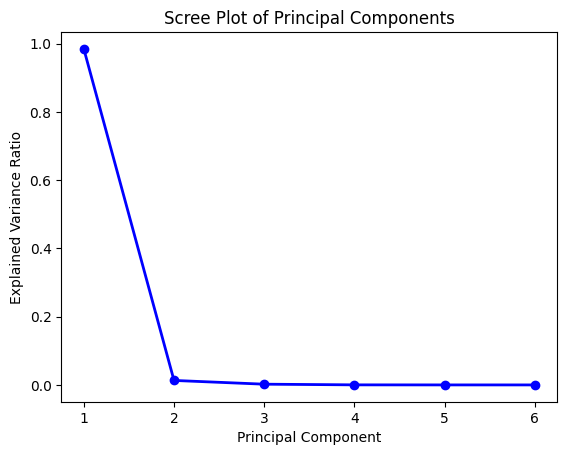

In [ ]:
# get values 1-6 for x-axis
pc_values = np.arange(pca.n_components_) + 1

# scree plot
plt.plot(pc_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot of Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show();

We can see that the vast majority of the variance is contained in the first principal component.

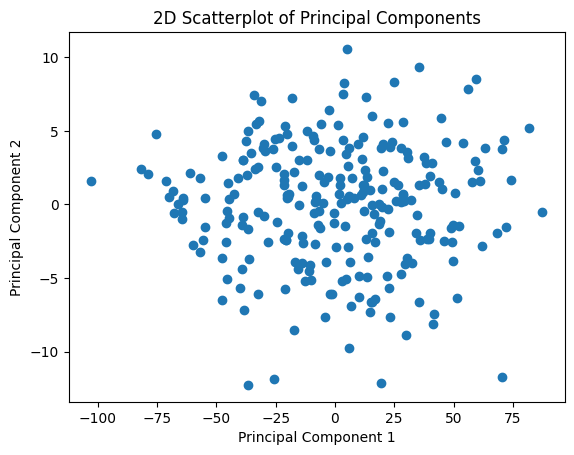

In [ ]:
# 2D scatterplot
plt.scatter(data = pca_data, x = "PC1", y = "PC2")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatterplot of Principal Components')
plt.show();

In [ ]:
# add hover data label
pca_data['team_season'] = pca_data['team'] + '-' + pca_data['season'].astype(str)

In [ ]:
# add original data back in
pca_data['yards_gained'] = season_data['yards_gained']
pca_data['pass_attempt'] = season_data['pass_attempt']
pca_data['rush_attempt'] = season_data['rush_attempt']
pca_data['touchdown'] = season_data['touchdown']
pca_data['interceptions_against'] = season_data['interceptions_against']
pca_data['sacks_against'] = season_data['sacks_against']

In [ ]:
# 2D scatterplot
plot = px.scatter(pca_data, x = "PC1", y = "PC2",
           labels = {'x': 'Principal Component 1', 'y': 'Principal Component 2'},
           hover_data = {
               "team_season": True,
               "win_pct": True
           },
            color = "win_pct",
            title = "Win Percentage"
          )

plot.show()

In [ ]:
# 2D scatterplot
plot = px.scatter(pca_data, x = "PC1", y = "PC2",
           labels = {'x': 'Principal Component 1', 'y': 'Principal Component 2'},
           hover_data = {
               "team_season": True,
               "yards_gained": True
           },
            color = "yards_gained",
            title = "Yards Gained (per game)"
          )

plot.show()

In [ ]:
# 2D scatterplot
plot = px.scatter(pca_data, x = "PC1", y = "PC2",
           labels = {'x': 'Principal Component 1', 'y': 'Principal Component 2'},
           hover_data = {
               "team_season": True,
               "sacks_against": True
           },
            color = "sacks_against",
            title = "Sacks Against (per game)"
          )

plot.show()

In [ ]:
# 2D scatterplot
plot = px.scatter(pca_data, x = "PC1", y = "PC2",
           labels = {'x': 'Principal Component 1', 'y': 'Principal Component 2'},
           hover_data = {
               "team_season": True,
               "interceptions_against": True
           },
            color = "interceptions_against",
            title = "Interceptions Against (per game)"
          )

plot.show()

In [ ]:
# 2D scatterplot
plot = px.scatter(pca_data, x = "PC1", y = "PC2",
           labels = {'x': 'Principal Component 1', 'y': 'Principal Component 2'},
           hover_data = {
               "team_season": True,
               "pass_attempt": True
           },
            color = "pass_attempt",
            title = "Pass Attempts (per game)"
          )

plot.show()

In [ ]:
# 2D scatterplot
plot = px.scatter(pca_data, x = "PC1", y = "PC2",
           labels = {'x': 'Principal Component 1', 'y': 'Principal Component 2'},
           hover_data = {
               "team_season": True,
               "rush_attempt": True
           },
            color = "rush_attempt",
            title = "Rush Attempts (per game)"
          )

plot.show()

## Clustering

### Get Silhouette Score

In [ ]:
scores = []
for i in range(5):
  # check n_clusters from 2 to 6
  i += 2
  kms = KMeans(n_clusters = i, random_state = 123)
  cluster_labels = kms.fit_predict(pca_data[["PC1", "PC2"]])
  score = silhouette_score(pca_data[["PC1", "PC2"]], cluster_labels)
  scores.append(score)
  print(f"{i} clusters: {score:.3}")

2 clusters: 0.55
3 clusters: 0.497
4 clusters: 0.483
5 clusters: 0.472
6 clusters: 0.476


2 clusters is the best because its silhouette score is higher.

In [ ]:
# fit k-means
k_means_fit = kmeans(pca_data[["PC1", "PC2"]], 2, seed = 123)

# add k-means label
pca_data["cluster"] = vq(pca_data[["PC1", "PC2"]], k_means_fit[0])[0]

In [ ]:
# cluster labels (6 clusters)
pca_data["cluster"].unique()

array([0, 1], dtype=int32)

In [ ]:
pca_data.groupby("cluster").agg(
    {
        "win_pct": ["mean", "median", "std"],
        "yards_gained": ["mean", "median", "std"],
        "interceptions_against": ["mean", "median", "std"]
    }
)

win_pct                  yards_gained                         \
             mean median       std         mean      median        std   
cluster                                                                  
0        0.582692  0.611  0.157229   371.883728  367.500000  20.527731   
1        0.391958  0.412  0.148285   313.648468  317.366028  21.005059   

        interceptions_against                      
                         mean    median       std  
cluster                                            
0                    0.741581  0.722222  0.263471  
1                    0.873763  0.823529  0.261194

In [ ]:
# 2D scatterplot
plot = px.scatter(pca_data, x = "PC1", y = "PC2",
           labels = {'x': 'Principal Component 1', 'y': 'Principal Component 2'},
           hover_data = {
               "team_season": True,
               "win_pct": True
           },
            color = "cluster",
            title = "Win Percentage - Colored by Cluster"
          )

plot.show()

## Interpretation and Analysis

Using only two clusters, there are discernable differences between the clusters' average yards per game, interceptions against, and win percentage.  I also tried using more clusters and found that the trend stayed the same even up to 6 clusters.

## Questions for Reflection:
How did PCA simplify the dataset, and what insights were preserved? <br>
PCA was able to still preserve most of the observable insights.  Teams with higher win percentages typically had more yards and less interceptions and there was no real trend between pass or rush attempts and win percentage.<br><br>

Were there any clusters that grouped similar types of players or teams? Describe these patterns. <br>
The clusters were able to group teams with higher win percentages, yards per game, and lower average interceptions per game.<br><br>

If you were to adjust the clustering parameters, what changes might you explore? <br>
I tried clustering with more clusters and found that the general differences between the two clusters were also found using more clusters.  However, I didn't check if the pass attempts and rush attempts changed, but I would be curious to see what impact more clusters could have on that.